# introduction to Regression with Neural Network

predicting numerical variable based on some other independent variable

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Creatng data to view and fit

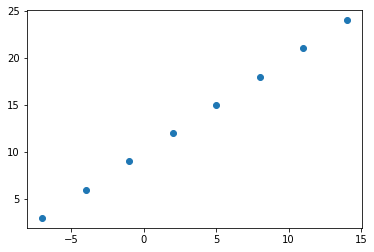

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create feature
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X,y)

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
X.shape, y.shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# turn numpy arrays into tensor
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

In [9]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(tf.reshape(X, shape= (-1,1)),tf.reshape(y, shape= (-1,1)))

LinearRegression()

In [10]:
linear.predict([[17.0]])

array([[27.]])

## Input and output shapes

In [11]:
# Set random seed
tf.random.set_seed(42)

In [12]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='sgd', 
              loss='mae', 
              metrics=["mae"])

In [13]:
# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 859ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [60]:
weights

array([[0.8258744]], dtype=float32)

In [61]:
biases

array([0.05], dtype=float32)

In [62]:
model.predict([17.0])

array([[14.089865]], dtype=float32)

## improve our model

In [63]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4411 - mae: 10.4411
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 10.3086 - mae: 10.3086
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1761 - mae: 10.1761
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0436 - mae: 10.0436
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9111 - mae: 9.9111
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7786 - mae: 9.7786
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6461 - mae: 9.6461
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5136 - mae: 9.5136
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3811 - mae: 9.3811
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

In [65]:
model.predict([17.0])

array([[29.901575]], dtype=float32)

In [67]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 362ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [69]:
model.predict([17.0])

array([[31.727652]], dtype=float32)

In [70]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 13.9065 - mae: 13.9065
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2611 - mae: 13.2611
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6333 - mae: 12.6333
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9972 - mae: 11.9972
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3521 - mae: 11.3521
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6897 - mae: 10.6897
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0044 - mae: 10.0044
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3069 - mae: 9.3069
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5679 - mae: 8.5679
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.7917 - mae: 7.7917
Epoch 11/100
1/1 [==============================] - 0s 5ms/s

In [71]:
model.predict([17.0])

array([[32.448032]], dtype=float32)

In [74]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 503ms/step - loss: 14.2190 - mae: 14.2190
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7066 - mae: 13.7066
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1967 - mae: 13.1967
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6866 - mae: 12.6866
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1737 - mae: 12.1737
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 11.6553 - mae: 11.6553
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1288 - mae: 11.1288
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5913 - mae: 10.5913
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0403 - mae: 10.0403
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4727 - mae: 9.4727
Epoch 11/100
1/1 [==============================] - 0s 5

In [75]:
model.predict([17.0])

array([[30.079334]], dtype=float32)

In [77]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 376ms/step - loss: 15.2402 - mae: 15.2402
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 14.5238 - mae: 14.5238
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9008 - mae: 13.9008
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2749 - mae: 13.2749
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6430 - mae: 12.6430
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0034 - mae: 12.0034
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3546 - mae: 11.3546
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6947 - mae: 10.6947
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0215 - mae: 10.0215
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3327 - mae: 9.3327
Epoch 11/100
1/1 [==============================] - 0s

In [78]:
model.predict([17.0])

array([[27.675974]], dtype=float32)

## Evaluating model

In [15]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [16]:
# Make a label dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

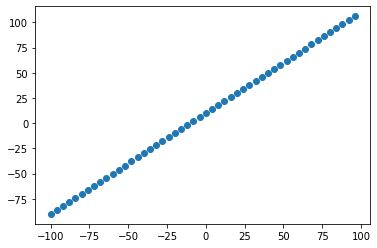

In [17]:
# Visualize data
plt.scatter(X,y)

In [18]:
len(X)

50

In [19]:
# Split the data into train test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(y_train), len(X_test), len(y_test) 

(40, 40, 10, 10)

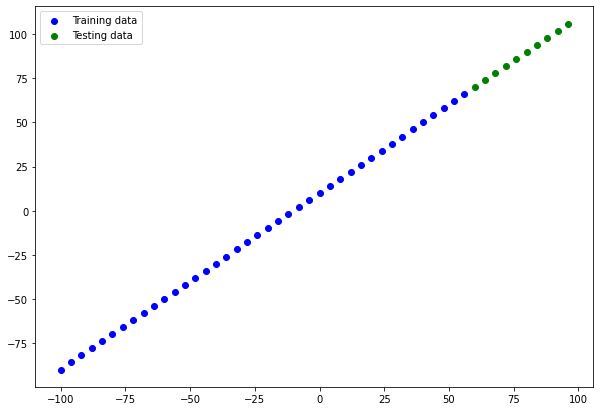

In [20]:
# Visualize data
plt.figure(figsize=(10,7))

# plot data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')

# plot data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')

# show legend
plt.legend()

In [21]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [2]:
# Lets create model

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile model
model.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
#model.fit(X, y, epochs=100)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


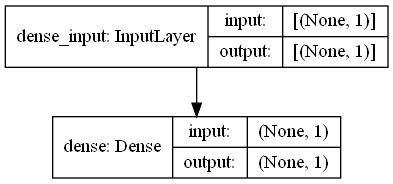

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model,
           show_shapes=True)

In [6]:
# Lets create model

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# Compile model
model.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
#model.fit(X, y, epochs=100)

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


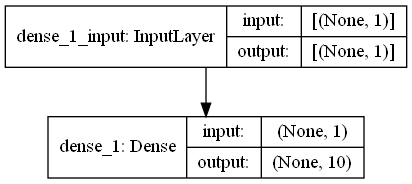

In [8]:
plot_model(model,
           show_shapes=True)

In [23]:
# Lets create model

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = 'input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'my_cool_model')

# Compile model
model.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
#model.fit(X, y, epochs=100)

In [24]:
model.summary()

Model: "my_cool_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


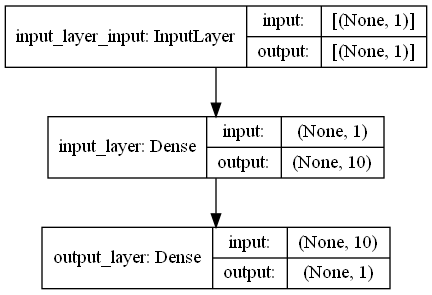

In [27]:
plot_model(model,
           show_shapes=True)

In [28]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 6ms/step - loss: 73.0019 - mae: 73.0019
Epoch 2/5
2/2 [==============================] - 0s 7ms/step - loss: 17.5325 - mae: 17.5325
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 20.4862 - mae: 20.4862
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 13.1871 - mae: 13.1871
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 14.5492 - mae: 14.5492


In [29]:
y_pred = model.predict(X_test)
y_pred

array([[ 64.84545 ],
       [ 69.16415 ],
       [ 73.482834],
       [ 77.80153 ],
       [ 82.120224],
       [ 86.43891 ],
       [ 90.7576  ],
       [ 95.0763  ],
       [ 99.395   ],
       [103.713684]], dtype=float32)

In [31]:
def plot_prediction(train_data = X_train,
                   train_labels = y_train,
                   test_data = X_test,
                   test_labels = y_test,
                   prediction = y_pred):
    
    """
    Plots training data, test data and compares prediction
    """
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='train_data')
    plt.scatter(test_data, test_labels, c='g', label='test_label')
    plt.scatter(test_data, prediction, c='r', label='prediction')
    plt.legend()

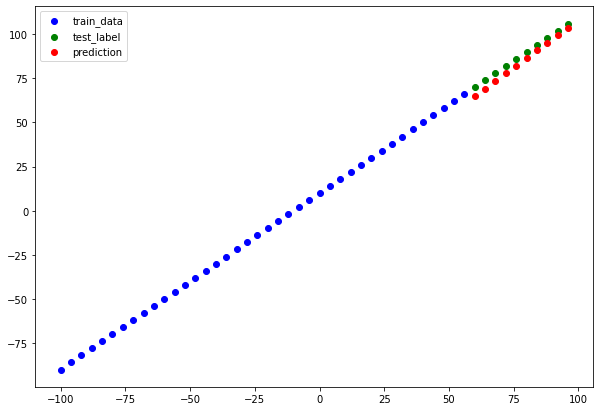

In [32]:
plot_prediction()

## Evaluation Metrix for regression

* MAE (when there is lots of outliers MAE will perform better)
* MSE (when larger errors are more significant than smaller errors)
* Huber (combination MAE and MSE)

In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 154ms/step - loss: 3.7204 - mae: 3.7204


[3.7204322814941406, 3.7204322814941406]

In [40]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [38]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.7204323>

In [41]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=14.679525>

In [54]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true,
                                          y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true,
                                         y_pred = tf.squeeze(y_pred))

## Lets do some experiment

In [43]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [70]:
# Model 1 (1 layer for 100 epochs)
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name = 'model_1')

# Compile model
model_1.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

2/2 [==============================] - 0s 7ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 8

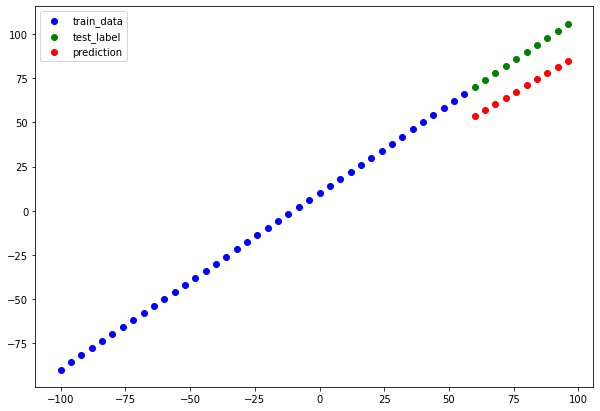

In [72]:
# Make and plot prediction for model_1
y_preds_1 = model_1.predict(X_test)
plot_prediction(prediction=y_preds_1)

In [73]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

In [74]:
# Model 2 (2 layers, mse metrics, for 100 epochs)
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = 'input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'model_2')

# Compile model
model_2.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mse"])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8951
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8038
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3746
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0093
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4385
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 7ms/step - loss: 15.2862 - mse: 315.3605
Epoch 87/100
2/2 [==============================] - 0s 7ms/step - loss: 19.1086 - mse: 521.2532
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8229 - mse: 1287.1917
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1742 - mse: 124.1342
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 21.5240 - mse: 663.8616
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5716 - mse: 161.7467
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 18.3977 - mse: 464.1330
Epoch 93/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4138 - mse: 81.9820
Epoch 94/100
2/2 [==============================] - 0s 7ms/step - loss: 17.7380 - mse: 445.7383
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1144 - mse: 164.0822
Epoch 96/100
2/2 [==============================] - 0

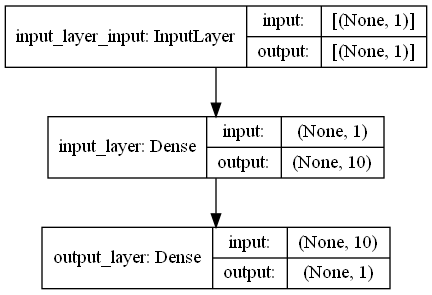

In [75]:
# plot model summary
plot_model(model_2,
           show_shapes=True)

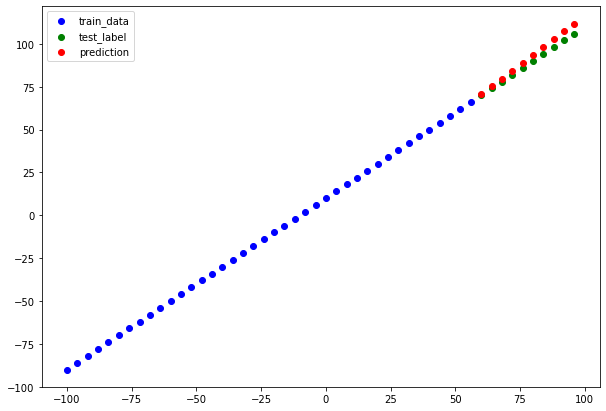

In [77]:
# Make and plot prediction for model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(prediction=y_preds_2)

In [78]:
# Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.0703>)

In [79]:
# Model 3 (2 layers, mae metrics, for 500 epochs)
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = 'input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'model_2')

# Compile model
model_3.compile(optimizer= 'sgd', 
              loss='mae', 
              metrics=["mae"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 9ms/

2/2 [==============================] - 0s 7ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8229 - mae: 29.8229
Epoch 89/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 6ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 6ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 6ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 6ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/500
2/2 [==============================] - 0s 8ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/500
2/2 [==============================] - 0s 6ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/500
2/2 [==============================] - 0s 6ms/step -

2/2 [==============================] - 0s 7ms/step - loss: 16.5279 - mae: 16.5279
Epoch 174/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 7ms/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 7ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 7ms/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 5ms/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 6ms/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [==============================] - 0s 7ms/step - loss: 7.8992 - mae: 7.8992
Epoch 181/500
2/2 [==============================] - 0s 7ms/step - loss: 17.4015 - mae: 17.4015
Epoch 182/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0089 - mae: 11.0089
Epoch 183/500
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 7ms/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 7ms/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 7ms/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 6ms/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 7ms/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 9ms/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [==============================] - 0s 8ms/step - loss: 21.0154 - mae: 21.0154
Epoch 265/500
2/2 [==============================] - 0s 8ms/step - loss: 19.3731 - mae: 19.3731
Epoch 266/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4735 - mae: 11.4735
Epoch 267/500
2/2 [==============================] - 0s 7ms/step - loss: 7.5302 - mae: 7.5302
Epoch 268/500
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 8ms/step - loss: 9.3943 - mae: 9.3943
Epoch 344/500
2/2 [==============================] - 0s 7ms/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [==============================] - 0s 7ms/step - loss: 37.4876 - mae: 37.4876
Epoch 346/500
2/2 [==============================] - 0s 7ms/step - loss: 16.8830 - mae: 16.8830
Epoch 347/500
2/2 [==============================] - 0s 6ms/step - loss: 12.8748 - mae: 12.8748
Epoch 348/500
2/2 [==============================] - 0s 6ms/step - loss: 8.1960 - mae: 8.1960
Epoch 349/500
2/2 [==============================] - 0s 6ms/step - loss: 13.5568 - mae: 13.5568
Epoch 350/500
2/2 [==============================] - 0s 8ms/step - loss: 15.4354 - mae: 15.4354
Epoch 351/500
2/2 [==============================] - 0s 7ms/step - loss: 32.9626 - mae: 32.9626
Epoch 352/500
2/2 [==============================] - 0s 8ms/step - loss: 14.2040 - mae: 14.2040
Epoch 353/500
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 8ms/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7869 - mae: 10.7869
Epoch 430/500
2/2 [==============================] - 0s 7ms/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 7ms/step - loss: 10.6152 - mae: 10.6152
Epoch 432/500
2/2 [==============================] - 0s 7ms/step - loss: 11.4582 - mae: 11.4582
Epoch 433/500
2/2 [==============================] - 0s 6ms/step - loss: 11.3851 - mae: 11.3851
Epoch 434/500
2/2 [==============================] - 0s 6ms/step - loss: 30.3986 - mae: 30.3986
Epoch 435/500
2/2 [==============================] - 0s 6ms/step - loss: 10.5052 - mae: 10.5052
Epoch 436/500
2/2 [==============================] - 0s 7ms/step - loss: 28.8810 - mae: 28.8810
Epoch 437/500
2/2 [==============================] - 0s 5ms/step - loss: 8.5916 - mae: 8.5916
Epoch 438/500
2/2 [==============================] - 0s 

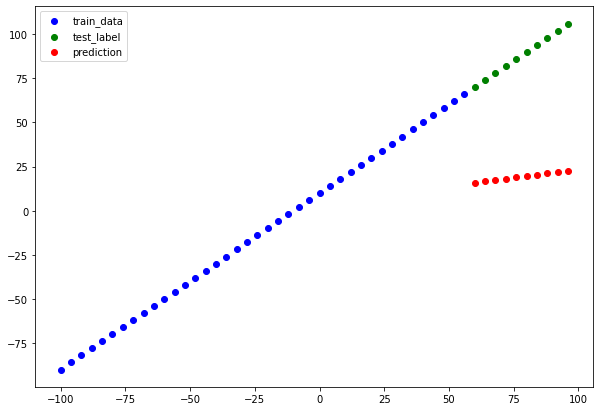

In [80]:
# Make and plot prediction for model_2
y_preds_3 = model_3.predict(X_test)
plot_prediction(prediction=y_preds_3)

In [81]:
# Calculate model_1 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

In [83]:
# Comparing our model
import pandas as pd

model_result = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]


result = pd.DataFrame(model_result, columns=['model1', 'model2', 'model3'])
result

,model1,model2,model3
0,model_1,18.745327,353.573395
1,model_2,3.196964,13.070300
2,model_3,68.713623,4808.028320


## Saving our models

There are two main formats to save our models in tensorflow

1. SaveModel format
2. HDF5 format

In [84]:
# Save model using SaveModel
model_2.save("bestModel_soFar_SaveModel")

INFO:tensorflow:Assets written to: bestModel_soFar_SaveModel\assets


In [85]:
# Save model using SaveModel
model_2.save("bestModel_soFar_HDF5.h5")

## Load models

In [86]:
# Load SaveModel format
loaded_SaveModel = tf.keras.models.load_model('bestModel_soFar_SaveModel')
loaded_SaveModel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [89]:
#Compare model_2 with saved models
model2_preds = model_2.predict(X_test)
loaded_SaveModel_preds = loaded_SaveModel.predict(X_test)
model2_preds == loaded_SaveModel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [90]:
# Load HDF5 format
loaded_h5 = tf.keras.models.load_model('bestModel_soFar_HDF5.h5')
loaded_h5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [92]:
#Compare model_2 with h5 model
model2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5.predict(X_test)
model2_preds == loaded_h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Some real case

In [94]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [97]:
data_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
urllib.request.urlretrieve(data_url, 'insurance.csv')

('insurance.csv', <http.client.HTTPMessage at 0x287735bec10>)

In [96]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


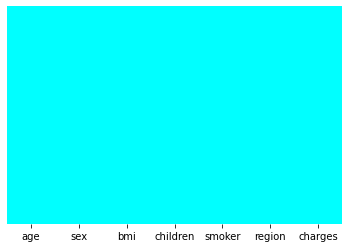

In [112]:
## Check for null values
import seaborn as sns
sns.heatmap(insurance.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='cool')

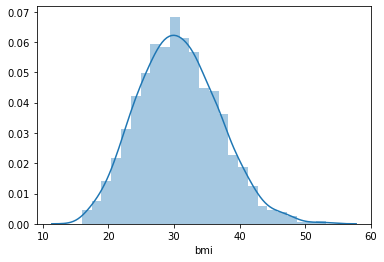

In [149]:
# plot distribution
sns.distplot(insurance.bmi)

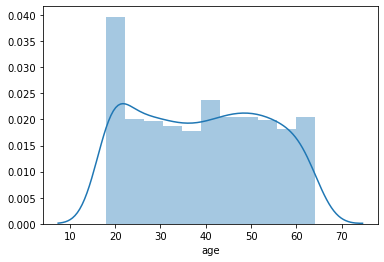

In [154]:
sns.distplot(insurance.age)

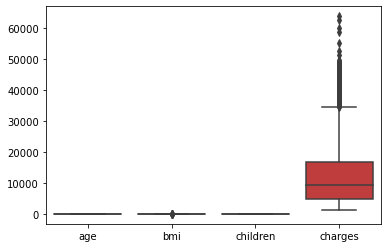

In [155]:
sns.boxplot(data=insurance)

In [127]:
print(insurance.region.unique())
print(insurance.smoker.unique())
print(insurance.sex.unique())
print(insurance.children.unique())

['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']
['female' 'male']
[0 1 3 2 5 4]


In [140]:
insurance.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

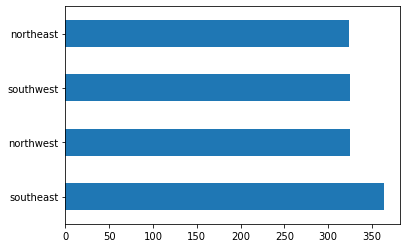

In [141]:
insurance.region.value_counts().plot(kind='barh')

In [125]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

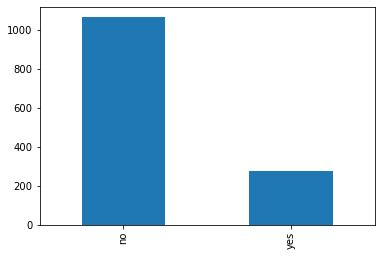

In [146]:
insurance.smoker.value_counts().plot(kind='bar')

In [126]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [129]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

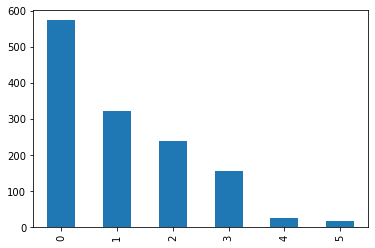

In [147]:
insurance.children.value_counts().plot(kind='bar')

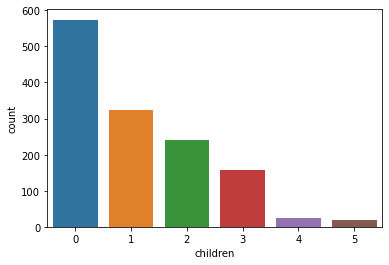

In [195]:
sns.countplot(insurance.children)

In [176]:
import plotly.express as px

fig = px.bar(insurance.region.value_counts())
fig.show()

In [209]:
insurance.groupby('region').nunique()

,age,sex,bmi,children,smoker,region,charges
region,,,,,,,
northeast,46,2,181,6,2,1,324
northwest,46,2,166,6,2,1,324
southeast,47,2,178,6,2,1,364
southwest,46,2,171,6,2,1,325


In [192]:
import plotly.express as px

fig = px.bar(insurance, x='region', y='charges', color='smoker', barmode='group')
fig.show()

In [185]:
fig = px.pie(insurance, names='region', values='children')
fig.update_traces(textinfo='percent+value', insidetextfont=dict(color='white'))
fig.update_layout(legend={'itemclick' : False})
fig.show()

In [190]:
fig = px.bar(insurance, x='sex', y='charges',color='smoker',barmode='group')
fig.show()

In [210]:
# Lets go back to our problem
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [212]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [261]:
# one hot encod
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [262]:
# Create X & y values (feature and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [263]:
# Create training and test sets drop first
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [233]:
# Build model
tf.random.set_seed(42)

# Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss='mae',
                        optimizer='sgd',
                        metrics=['mae'])

# fit the model
insurance_model.fit(X_train_all, y_train_all, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5581 - mae: 7698.5581
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7493.1743 - mae: 7493.1743

34/34 [==============================] - 0s 5ms/step - loss: 7176.5215 - mae: 7176.5215
Epoch 83/100
34/34 [==============================] - 0s 5ms/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 5ms/step - loss: 7403.1294 - mae: 7403.1294
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7356.0083 - mae: 7356.0083
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 7134.1558 - mae: 7134.1558
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 7083.4351 - mae: 7083.4351
Epoch 91/100
34/34 [==============================] - 0s 5ms/step - loss: 7254.1782 - mae: 7254.1782
Epo

In [234]:
insurance_model.evaluate(X_test_all, y_test_all)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3267 - mae: 7023.3267


[7023.32666015625, 7023.32666015625]

In [235]:
y_train_all.median(), y_train_all.mean()

(9575.4421, 13346.089736364489)

In [246]:
# Build model
tf.random.set_seed(42)

# Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss='mae',
                        optimizer='sgd',
                        metrics=['mae'])

# fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 8622.7656 - mae: 8622.7656
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7888.7065 - mae: 7888.7065
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7609.7407 - mae: 7609.7407
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7788.2974 - mae: 7788.2974
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7665.2520 - mae: 7665.2520
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7662.0391 - mae: 7662.0391
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7577.1006 - mae: 7577.1006
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7825.6172 - mae: 7825.6172
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7464.4756 - mae: 7464.4756
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7727.0820 - mae: 7727.0820

34/34 [==============================] - 0s 5ms/step - loss: 7273.9072 - mae: 7273.9072
Epoch 82/100
34/34 [==============================] - 0s 4ms/step - loss: 7445.8203 - mae: 7445.8203
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.4961 - mae: 7737.4961
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 7639.2578 - mae: 7639.2578
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 7781.3628 - mae: 7781.3628
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 7526.7422 - mae: 7526.7422
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 7510.4839 - mae: 7510.4839
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 7337.5908 - mae: 7337.5908
Epoch 89/100
34/34 [==============================] - 0s 6ms/step - loss: 7453.5723 - mae: 7453.5723
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 7407.4248 - mae: 7407.4248
Epo

In [247]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7999.9673 - mae: 7999.9673


[7999.96728515625, 7999.96728515625]

In [238]:
y_train_all.median(), y_train_all.mean()

(9575.4421, 13346.089736364489)

## Lets try make the model better

In [266]:
# set random seed
tf.random.set_seed(42)

# Create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model_2.compile(loss='mae',
                        optimizer='adam',
                        metrics=['mae'])

# fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7528.8403 - mae: 7528.8403
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 7ms/step - loss: 5887.9995 - mae: 5887.9995
Epoch 81/100
34/34 [==============================] - 0s 7ms/step - loss: 5861.6992 - mae: 5861.6992
Epoch 82/100
34/34 [==============================] - 0s 7ms/step - loss: 5834.3081 - mae: 5834.3081
Epoch 83/100
34/34 [==============================] - 0s 7ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 7ms/step - loss: 5772.3237 - mae: 5772.3237
Epoch 85/100
34/34 [==============================] - 0s 6ms/step - loss: 5745.1519 - mae: 5745.1519
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 5711.3491 - mae: 5711.3491
Epoch 87/100
34/34 [==============================] - 0s 7ms/step - loss: 5674.5220 - mae: 5674.5220
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 5639.4932 - mae: 5639.4932
Epoch 89/100
34/34 [==============================] - 0s 6ms/step - loss: 5600.6660 - mae: 5600.6660
Epo

In [265]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [243]:
# set random seed
tf.random.set_seed(42)

# Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model_3.compile(loss='mae',
                        optimizer='adam',
                        metrics=['mae'])

# fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13273.5039 - mae: 13273.5039
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13106.1064 - mae: 13106.1064
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12755.9971 - mae: 12755.9971
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12074.5020 - mae: 12074.5020
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 10943.2754 - mae: 10943.2754
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9497.8945 - mae: 9497.8945
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8163.3457 - mae: 8163.3457
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7514.0981 - mae: 7514.0981
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7405.3110 - mae: 7405.3110
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7387.0771 - mae:

34/34 [==============================] - 0s 6ms/step - loss: 6344.7026 - mae: 6344.7026
Epoch 82/200
34/34 [==============================] - 0s 6ms/step - loss: 6337.2969 - mae: 6337.2969
Epoch 83/200
34/34 [==============================] - 0s 6ms/step - loss: 6327.6602 - mae: 6327.6602
Epoch 84/200
34/34 [==============================] - 0s 6ms/step - loss: 6315.6226 - mae: 6315.6226
Epoch 85/200
34/34 [==============================] - 0s 5ms/step - loss: 6309.0117 - mae: 6309.0117
Epoch 86/200
34/34 [==============================] - 0s 5ms/step - loss: 6296.7710 - mae: 6296.7710
Epoch 87/200
34/34 [==============================] - 0s 6ms/step - loss: 6288.2002 - mae: 6288.2002
Epoch 88/200
34/34 [==============================] - 0s 6ms/step - loss: 6278.0747 - mae: 6278.0747
Epoch 89/200
34/34 [==============================] - 0s 5ms/step - loss: 6270.0649 - mae: 6270.0649
Epoch 90/200
34/34 [==============================] - 0s 5ms/step - loss: 6256.3965 - mae: 6256.3965
Epo

34/34 [==============================] - 0s 5ms/step - loss: 3778.9995 - mae: 3778.9995
Epoch 162/200
34/34 [==============================] - 0s 5ms/step - loss: 3755.0032 - mae: 3755.0032
Epoch 163/200
34/34 [==============================] - 0s 5ms/step - loss: 3750.5991 - mae: 3750.5991
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 3756.5808 - mae: 3756.5808
Epoch 165/200
34/34 [==============================] - 0s 5ms/step - loss: 3745.2427 - mae: 3745.2427
Epoch 166/200
34/34 [==============================] - 0s 6ms/step - loss: 3741.1494 - mae: 3741.1494
Epoch 167/200
34/34 [==============================] - 0s 5ms/step - loss: 3731.9150 - mae: 3731.9150
Epoch 168/200
34/34 [==============================] - 0s 5ms/step - loss: 3728.5359 - mae: 3728.5359
Epoch 169/200
34/34 [==============================] - 0s 5ms/step - loss: 3735.0168 - mae: 3735.0168
Epoch 170/200
34/34 [==============================] - 0s 5ms/step - loss: 3720.2712 - mae: 3720

In [244]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3443.8220 - mae: 3443.8220


[3443.822021484375, 3443.822021484375]

In [248]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7999.9673 - mae: 7999.9673


[7999.96728515625, 7999.96728515625]

Text(0.5, 0, 'epoch')

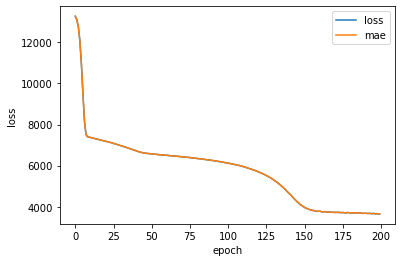

In [250]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')

## Preprocessing (Normalisation and standardization)

In [251]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [252]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [256]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [257]:
# set random seed
tf.random.set_seed(42)

# Create model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model_4.compile(loss='mae',
                        optimizer='adam',
                        metrics=['mae'])

# fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 11925.96

34/34 [==============================] - 0s 5ms/step - loss: 3676.9766 - mae: 3676.9766
Epoch 82/100
34/34 [==============================] - 0s 5ms/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/100
34/34 [==============================] - 0s 6ms/step - loss: 3667.8455 - mae: 3667.8455
Epoch 84/100
34/34 [==============================] - 0s 5ms/step - loss: 3664.5759 - mae: 3664.5759
Epoch 85/100
34/34 [==============================] - 0s 5ms/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 3660.3044 - mae: 3660.3044
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 6ms/step - loss: 3655.2202 - mae: 3655.2202
Epoch 89/100
34/34 [==============================] - 0s 5ms/step - loss: 3653.8833 - mae: 3653.8833
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 3652.0193 - mae: 3652.0193
Epo

In [258]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

9/9 [==============================] - 0s 4ms/step - loss: 4924.5107 - mae: 4924.5107

[4924.5107421875, 4924.5107421875]